In [133]:
import pandas as pd
import numpy as np

In [135]:
train_df = pd.read_csv(r"/Users/mohammedyousuf/Documents/House_Price_Prediction/data/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
test_df = pd.read_csv(r"/Users/mohammedyousuf/Documents/House_Price_Prediction/data/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [139]:
train_df.shape, test_df.shape 

((1460, 81), (1459, 80))

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Duplicate values Treatment

In [167]:
duplicate_count = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Missing Values Treatment

In [144]:
train_df.isnull().sum().sort_values(ascending = False)[train_df.isnull().sum() > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [146]:
#Lets drop the columns with more number of missing values as these columns anyway not adding much value on the SalePrice

train_df = train_df.drop(columns = ["PoolQC", "MiscFeature","Alley", "Fence"])

In [148]:
train_df.isnull().sum().sort_values(ascending = False)[train_df.isnull().sum() > 0]

MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
Electrical        1
dtype: int64

In [150]:
# Separate categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
numerical_cols = train_df.select_dtypes(include=['number']).columns

print("categorical_cols - ",categorical_cols)
print("-------------------")
print("numerical_cols - ",numerical_cols)

categorical_cols -  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
-------------------
numerical_cols -  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom

In [152]:
#For now lets fill the missing value - for categorical cols lets fill with mode and for numerical cols lets fill with median

for cols in categorical_cols:
    if train_df[cols].isnull().sum()>0:
        train_df[cols] = train_df[cols].fillna(train_df[cols].mode()[0])
        print(cols, "filled with mode - ", train_df[cols].mode()[0])



for cols in numerical_cols:
    if train_df[cols].isnull().sum()>0:
        train_df[cols] = train_df[cols].fillna(train_df[cols].median())
        print(cols, "filled with median - ", train_df[cols].median())

MasVnrType filled with mode -  BrkFace
BsmtQual filled with mode -  TA
BsmtCond filled with mode -  TA
BsmtExposure filled with mode -  No
BsmtFinType1 filled with mode -  Unf
BsmtFinType2 filled with mode -  Unf
Electrical filled with mode -  SBrkr
FireplaceQu filled with mode -  Gd
GarageType filled with mode -  Attchd
GarageFinish filled with mode -  Unf
GarageQual filled with mode -  TA
GarageCond filled with mode -  TA
LotFrontage filled with median -  69.0
MasVnrArea filled with median -  0.0
GarageYrBlt filled with median -  1980.0


In [154]:
#checking the missing values 
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

## Encoding

In [157]:
from sklearn.preprocessing import LabelEncoder

In [159]:
label_mappings = {}


for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    
    # Save mapping for each column
    col_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    label_mappings[col] = col_mapping

label_mappings

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'NAmes': 12,
  'NPkVill': 13,
  'NWAmes': 14,
  'NoRidge': 15,
  'NridgHt': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA': 3,
  'PosN': 4,
  'RRAe': 5,
  'RRAn': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA':

## Outlier Detection and Handling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower) | (train_df[col] > upper)]
    if not outliers.empty:
        print(f"{col}: {len(outliers)} outliers")


MSSubClass: 103 outliers
LotFrontage: 106 outliers
LotArea: 69 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 7 outliers
MasVnrArea: 98 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
BedroomAbvGr: 35 outliers
KitchenAbvGr: 68 outliers
TotRmsAbvGrd: 30 outliers
Fireplaces: 5 outliers
GarageYrBlt: 1 outliers
GarageCars: 5 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
SalePrice: 61 outliers


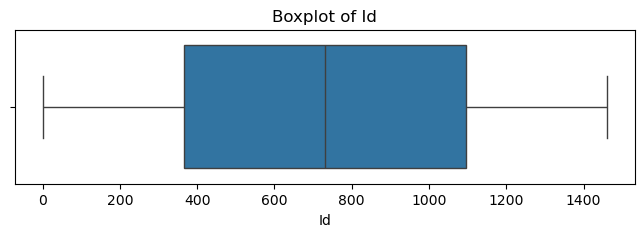

---------------------------


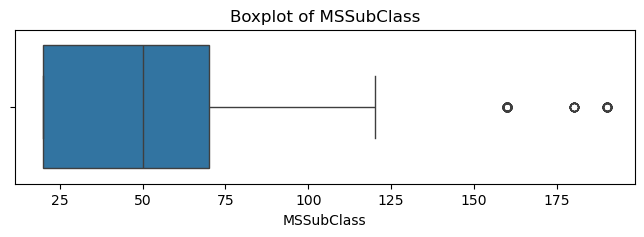

---------------------------


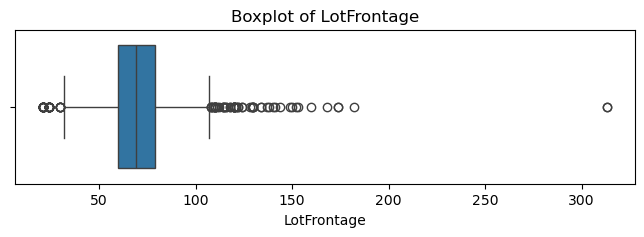

---------------------------


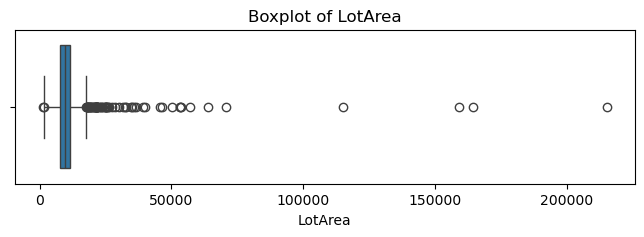

---------------------------


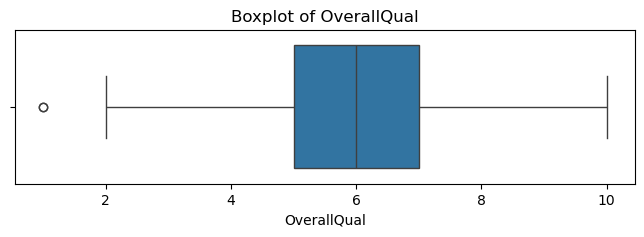

---------------------------


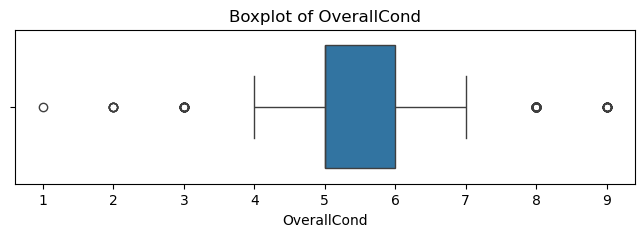

---------------------------


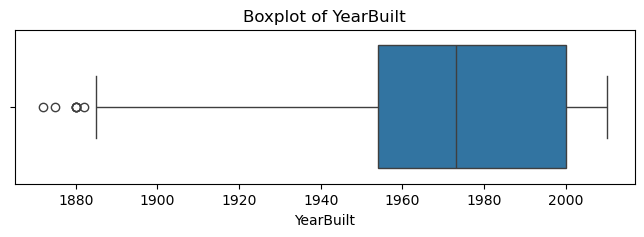

---------------------------


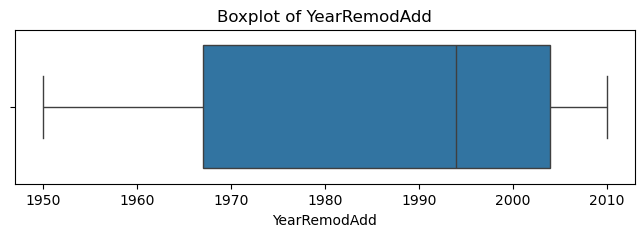

---------------------------


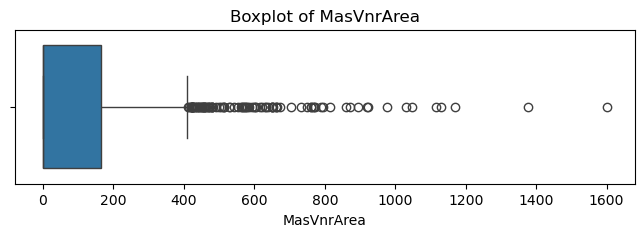

---------------------------


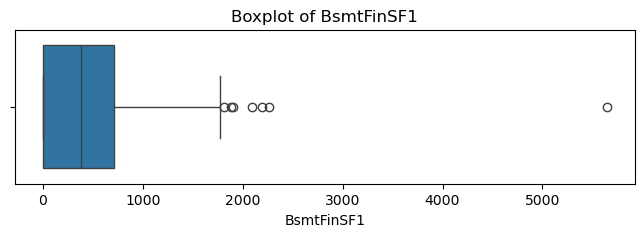

---------------------------


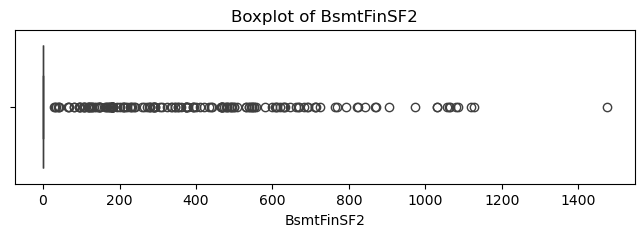

---------------------------


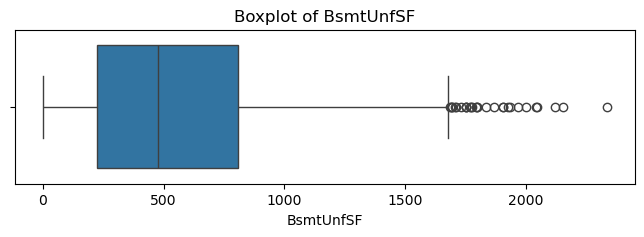

---------------------------


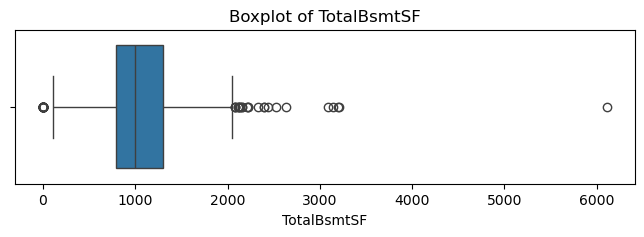

---------------------------


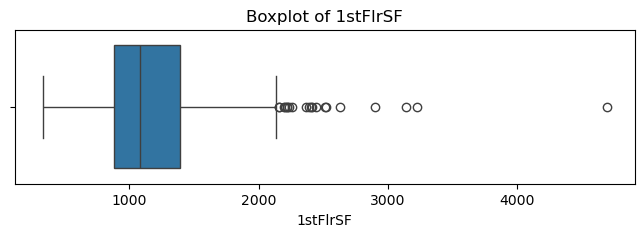

---------------------------


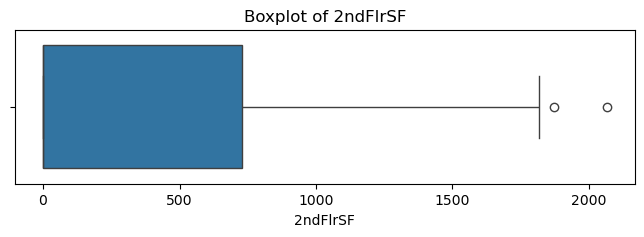

---------------------------


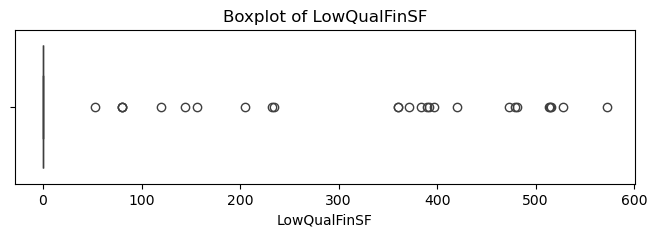

---------------------------


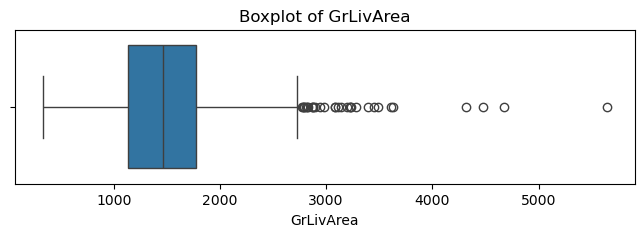

---------------------------


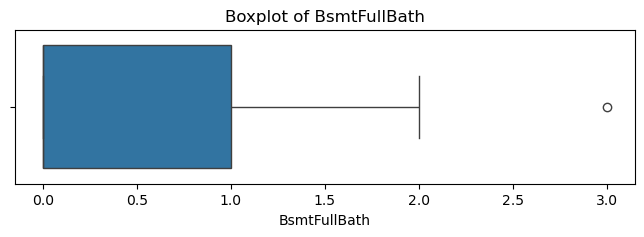

---------------------------


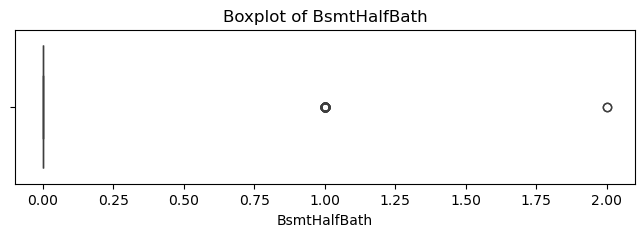

---------------------------


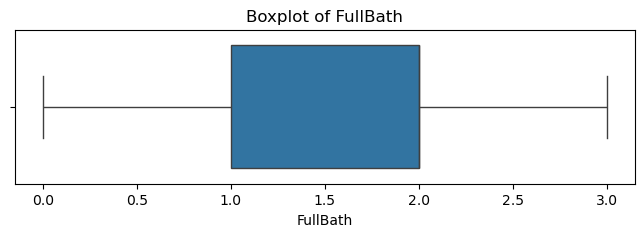

---------------------------


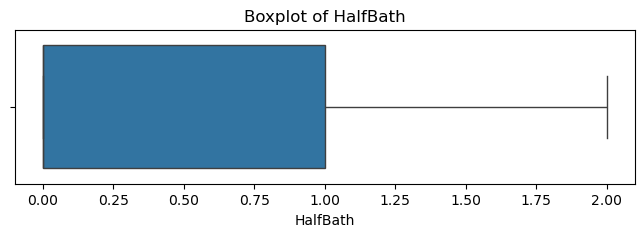

---------------------------


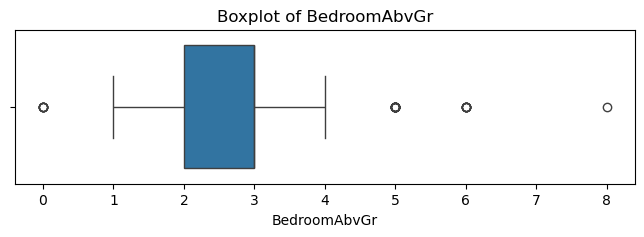

---------------------------


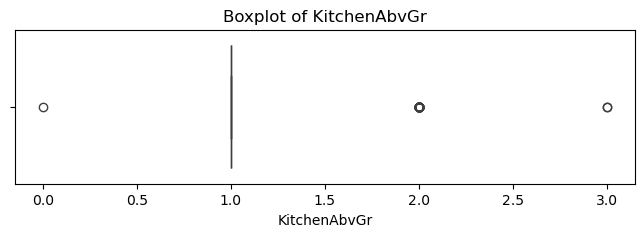

---------------------------


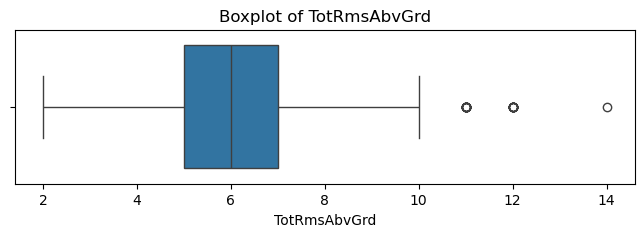

---------------------------


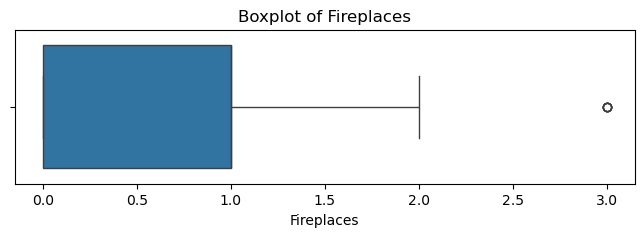

---------------------------


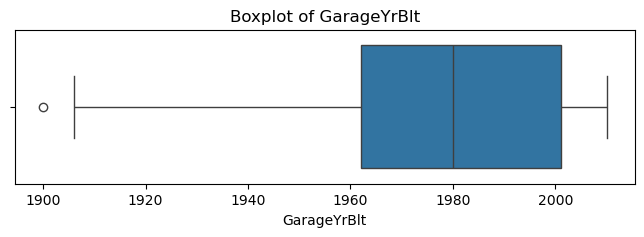

---------------------------


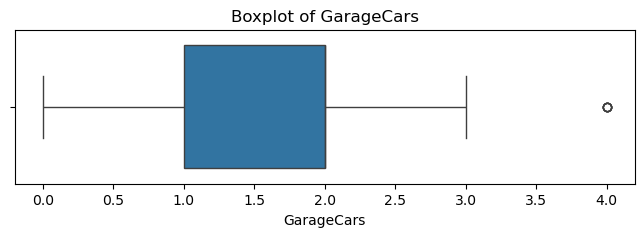

---------------------------


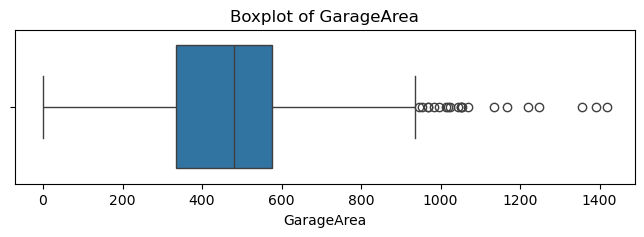

---------------------------


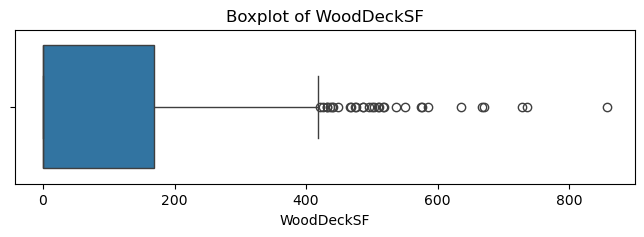

---------------------------


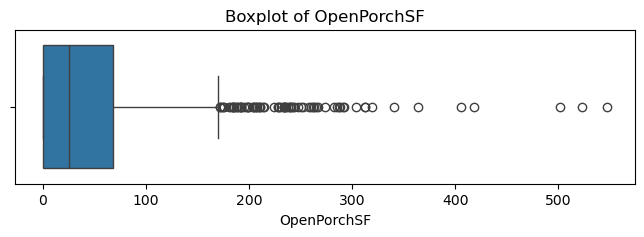

---------------------------


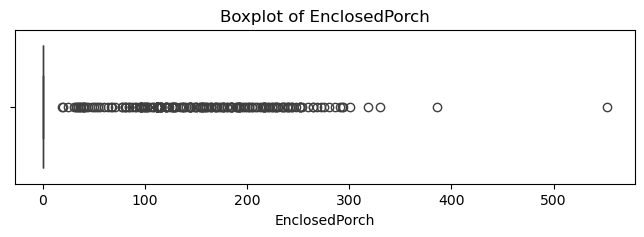

---------------------------


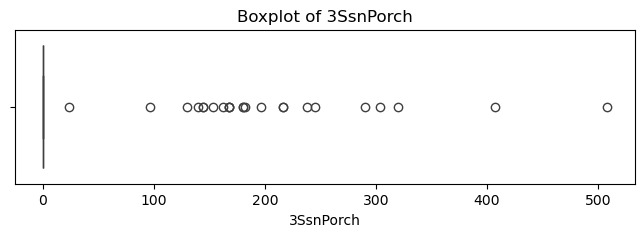

---------------------------


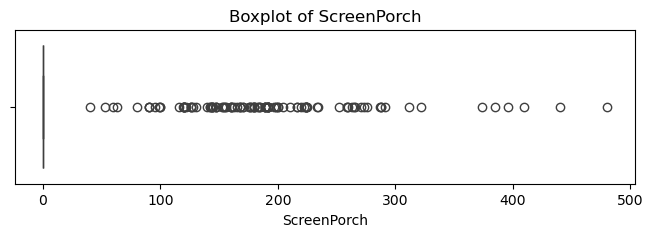

---------------------------


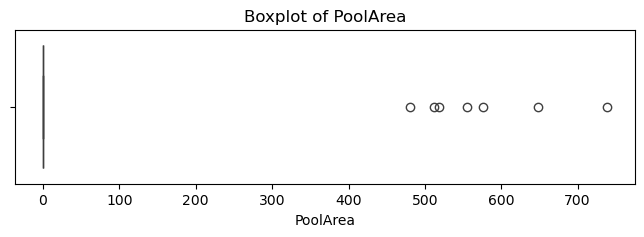

---------------------------


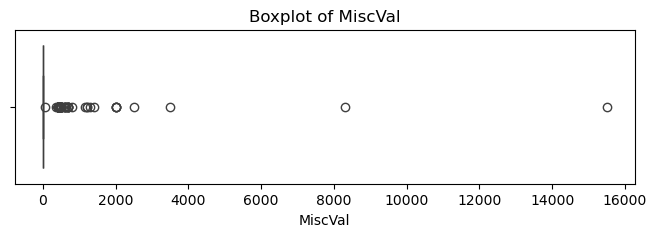

---------------------------


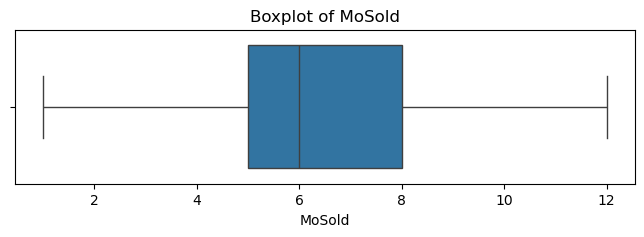

---------------------------


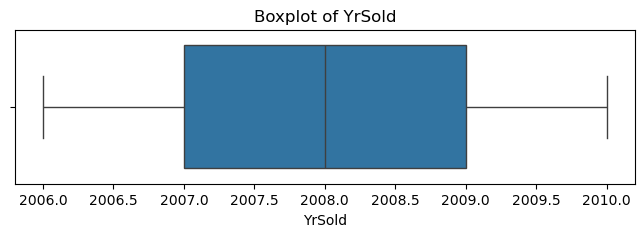

---------------------------


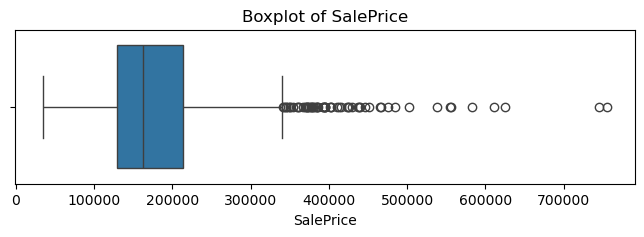

---------------------------


In [164]:
for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    print("---------------------------")


In [171]:
#Capping Outliers Uning IQR
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    train_df[col] = train_df[col].clip(lower, upper)


In [173]:
#checking outliers again
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower) | (train_df[col] > upper)]
    if not outliers.empty:
        print(f"{col}: {len(outliers)} outliers")


## Remove unnecessary columns 

In [185]:
train_df['Id'].nunique()

1460

In [187]:
#lets drop the Id column as it is not that helpful for the model
train_df = train_df.drop(columns = 'Id')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,0,0,0,0,0,2,2006,8,0,140000.0
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000.0


In [192]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

## Feature Engineering

In [204]:
# Total square footage
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

# Age of the house
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Age since remodeling
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge,RemodAge
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,0,0,2,2008,8,4,208500.0,2566.0,5,5
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,0,0,5,2007,8,4,181500.0,2524.0,31,31
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,0,0,9,2008,8,4,223500.0,2706.0,7,6
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,0,0,2,2006,8,0,140000.0,2473.0,91,36
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,0,0,12,2008,8,4,250000.0,3343.0,8,8


## Standardisation

In [206]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()
scaled_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop('SalePrice')

train_df[scaled_cols] = scaler.fit_transform(train_df[scaled_cols])

In [210]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge,RemodAge
0,0.131067,-0.045532,-0.237456,-0.333244,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,0.0,0.0,-1.599111,0.138777,0.313867,0.208502,208500.0,0.015826,-1.045496,-0.869941
1,-0.935733,-0.045532,0.633321,-0.013189,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,0.0,0.0,-0.489110,-0.614439,0.313867,0.208502,181500.0,-0.039853,-0.182997,0.390141
2,0.131067,-0.045532,-0.063300,0.446022,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,0.0,0.0,0.990891,0.138777,0.313867,0.208502,223500.0,0.201422,-0.979149,-0.821476
3,0.397766,-0.045532,-0.527714,-0.027104,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,0.0,0.0,-1.599111,-1.367655,0.313867,-3.426284,140000.0,-0.107463,1.807384,0.632464
4,0.131067,-0.045532,0.865528,1.283733,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,0.0,0.0,2.100892,0.138777,0.313867,0.208502,250000.0,1.045884,-0.945976,-0.724547


## Train-Test Split

In [227]:
from sklearn.model_selection import train_test_split

In [233]:
X = train_df.drop(columns = 'SalePrice')
y = train_df['SalePrice']

print(X.head())
print("----------------------------------------")
print(y.head())

   MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    0.131067 -0.045532    -0.237456 -0.333244  0.064238  0.750731   
1   -0.935733 -0.045532     0.633321 -0.013189  0.064238  0.750731   
2    0.131067 -0.045532    -0.063300  0.446022  0.064238 -1.378933   
3    0.397766 -0.045532    -0.527714 -0.027104  0.064238 -1.378933   
4    0.131067 -0.045532     0.865528  1.283733  0.064238 -1.378933   

   LandContour  Utilities  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  \
0     0.314667   -0.02618   0.604670  -0.225716  ...          0.0       0.0   
1     0.314667   -0.02618  -0.628316  -0.225716  ...          0.0       0.0   
2     0.314667   -0.02618   0.604670  -0.225716  ...          0.0       0.0   
3     0.314667   -0.02618  -1.861302  -0.225716  ...          0.0       0.0   
4     0.314667   -0.02618  -0.628316  -0.225716  ...          0.0       0.0   

   MiscVal    MoSold    YrSold  SaleType  SaleCondition   TotalSF  HouseAge  \
0      0.0 -1.599111  0.1

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Modeling

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [255]:
from sklearn.metrics import root_mean_squared_error

# Linear Regression RMSE
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = root_mean_squared_error(y_test, lr_pred)
print("Linear RMSE:", lr_rmse)
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression R² Score:", lr_r2)

print("-----------------------------------")

# Random Forest RMSE
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
print("Random Forest RMSE:", rf_rmse)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest R² Score:", rf_r2)


Linear RMSE: 22514.1470006491
Linear Regression R² Score: 0.8963262630491925
-----------------------------------
Random Forest RMSE: 19804.178281333072
Random Forest R² Score: 0.9197820770281264


## Working on test file

In [279]:
test_df = pd.read_csv(r"/Users/mohammedyousuf/Documents/House_Price_Prediction/data/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Duplicate values Treatment

In [277]:
duplicate_count = test_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Missing Values Treatment

In [281]:
test_df.isnull().sum().sort_values(ascending = False)[test_df.isnull().sum() > 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

In [283]:
#Lets drop the columns with more number of missing values as these columns anyway not adding much value on the SalePrice

test_df = test_df.drop(columns = ["PoolQC", "MiscFeature","Alley", "Fence"])

In [287]:
test_df.isnull().sum().sort_values(ascending = False)[test_df.isnull().sum() > 0]

MasVnrType      894
FireplaceQu     730
LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFullBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
dtype: int64

In [289]:
# Separate categorical and numerical columns
categorical_cols = test_df.select_dtypes(include=['object', 'category']).columns
numerical_cols = test_df.select_dtypes(include=['number']).columns

print("categorical_cols - ",categorical_cols)
print("-------------------")
print("numerical_cols - ",numerical_cols)

categorical_cols -  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
-------------------
numerical_cols -  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom

In [291]:
#For now lets fill the missing value - for categorical cols lets fill with mode and for numerical cols lets fill with median

for cols in categorical_cols:
    if test_df[cols].isnull().sum()>0:
        test_df[cols] = test_df[cols].fillna(test_df[cols].mode()[0])
        print(cols, "filled with mode - ", test_df[cols].mode()[0])



for cols in numerical_cols:
    if test_df[cols].isnull().sum()>0:
        test_df[cols] = test_df[cols].fillna(test_df[cols].median())
        print(cols, "filled with median - ", test_df[cols].median())

MSZoning filled with mode -  RL
Utilities filled with mode -  AllPub
Exterior1st filled with mode -  VinylSd
Exterior2nd filled with mode -  VinylSd
MasVnrType filled with mode -  BrkFace
BsmtQual filled with mode -  TA
BsmtCond filled with mode -  TA
BsmtExposure filled with mode -  No
BsmtFinType1 filled with mode -  GLQ
BsmtFinType2 filled with mode -  Unf
KitchenQual filled with mode -  TA
Functional filled with mode -  Typ
FireplaceQu filled with mode -  Gd
GarageType filled with mode -  Attchd
GarageFinish filled with mode -  Unf
GarageQual filled with mode -  TA
GarageCond filled with mode -  TA
SaleType filled with mode -  WD
LotFrontage filled with median -  67.0
MasVnrArea filled with median -  0.0
BsmtFinSF1 filled with median -  350.5
BsmtFinSF2 filled with median -  0.0
BsmtUnfSF filled with median -  460.0
TotalBsmtSF filled with median -  988.0
BsmtFullBath filled with median -  0.0
BsmtHalfBath filled with median -  0.0
GarageYrBlt filled with median -  1979.0
GarageCar

In [293]:
#checking the missing values 
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

## Encoding

In [296]:
label_mappings = {}


for col in categorical_cols:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])
    
    # Save mapping for each column
    col_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    label_mappings[col] = col_mapping

label_mappings

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'NAmes': 12,
  'NPkVill': 13,
  'NWAmes': 14,
  'NoRidge': 15,
  'NridgHt': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA': 3,
  'PosN': 4,
  'RRAe': 5,
  'RRAn': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4},
 'B

## Remove unnecessary columns 

In [298]:
test_df['Id'].nunique()

1459

In [302]:
#lets drop the Id column as it is not that helpful for the model
test_df = test_df.drop(columns = 'Id')
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [305]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

## Feature Engineering

In [307]:
# Total square footage
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

# Age of the house
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

# Age since remodeling
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,HouseAge,RemodAge
0,20,2,80.0,11622,1,3,3,0,4,0,...,120,0,0,6,2010,8,4,1778.0,49,49
1,20,3,81.0,14267,1,0,3,0,0,0,...,0,0,12500,6,2010,8,4,2658.0,52,52
2,60,3,74.0,13830,1,0,3,0,4,0,...,0,0,0,3,2010,8,4,2557.0,13,12
3,60,3,78.0,9978,1,0,3,0,4,0,...,0,0,0,6,2010,8,4,2530.0,12,12
4,120,3,43.0,5005,1,0,1,0,4,0,...,144,0,0,1,2010,8,4,2560.0,18,18


## Standardisation

In [313]:
scaler = StandardScaler()
scaled_cols = test_df.select_dtypes(include=['float64', 'int64']).columns

test_df[scaled_cols] = scaler.fit_transform(test_df[scaled_cols])

In [315]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,HouseAge,RemodAge
0,-0.874711,-1.501777,0.567330,0.363929,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383,-0.954072,0.413784,1.178391
1,-0.874711,-0.039098,0.615963,0.897861,0.06426,-1.384637,0.31870,0.0,-1.950811,-0.207992,...,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.32475,0.201383,0.164507,0.512398,1.320405
2,0.061351,-0.039098,0.275532,0.809646,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.32475,0.201383,0.036124,-0.769577,-0.573119
3,0.061351,-0.039098,0.470064,0.032064,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383,0.001804,-0.802448,-0.573119
4,1.465443,-0.039098,-1.232092,-0.971808,0.06426,-1.384637,-2.53396,0.0,0.572445,-0.207992,...,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.32475,0.201383,0.039938,-0.605221,-0.289090


## Predicting the Test dataset

In [318]:
# Using Random Forest as it delivered better results
X_test_final = test_df[X_train.columns]  
test_predictions = rf.predict(X_test_final)

In [320]:
test_df['Predicted_SalePrice'] = test_predictions

In [322]:
test_df.to_excel("test_with_predictions.xlsx", index=False)